In [1]:
# 由于执行环境被重置，需要重新导入必要的库
from sklearn.datasets import load_wine, load_breast_cancer
from sklearn.model_selection import train_test_split, learning_curve, validation_curve
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from time import time

C:\Users\hubin\AppData\Roaming\Python\Python38\site-packages\scipy\__init__.py:173: UserWarning: A NumPy version >=1.19.5 and <1.27.0 is required for this version of SciPy (detected version 1.19.2)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


<ipython-input-3-dd1ecfe7a406>:32: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(1, 2, 1)
<ipython-input-3-dd1ecfe7a406>:37: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(1, 2, 2)
<ipython-input-3-dd1ecfe7a406>:40: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and r

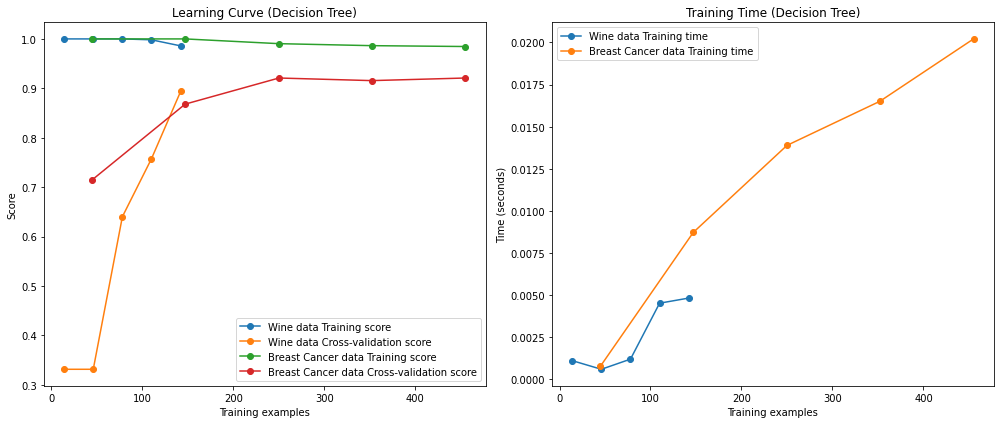

<ipython-input-3-dd1ecfe7a406>:32: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(1, 2, 1)
<ipython-input-3-dd1ecfe7a406>:37: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(1, 2, 2)
<ipython-input-3-dd1ecfe7a406>:40: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and r

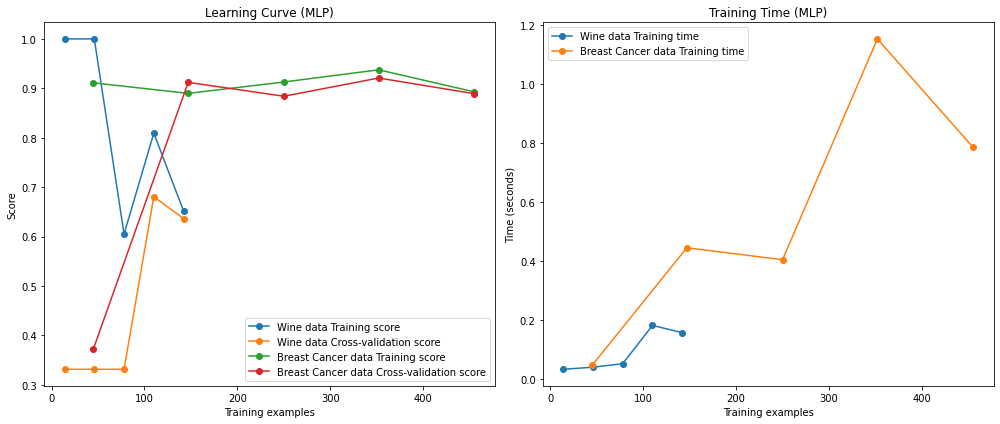

<ipython-input-3-dd1ecfe7a406>:32: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(1, 2, 1)
<ipython-input-3-dd1ecfe7a406>:37: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(1, 2, 2)
<ipython-input-3-dd1ecfe7a406>:40: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and r

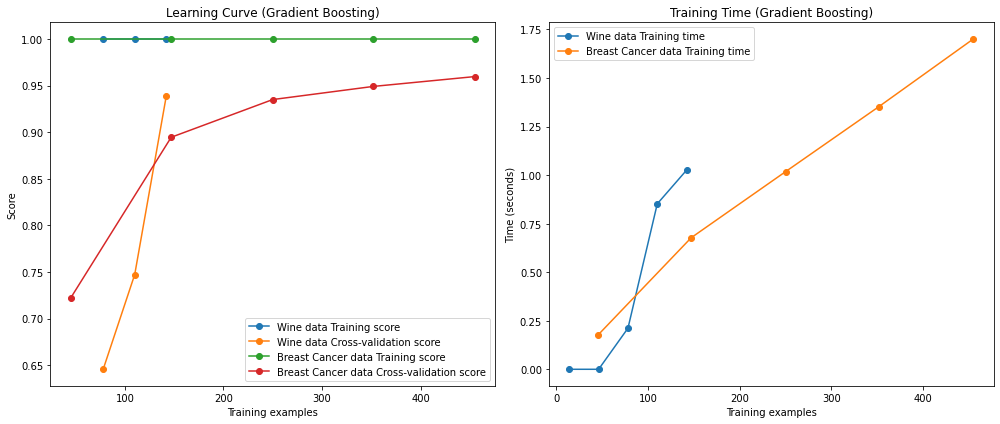

<ipython-input-3-dd1ecfe7a406>:32: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(1, 2, 1)
<ipython-input-3-dd1ecfe7a406>:37: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(1, 2, 2)
<ipython-input-3-dd1ecfe7a406>:40: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and r

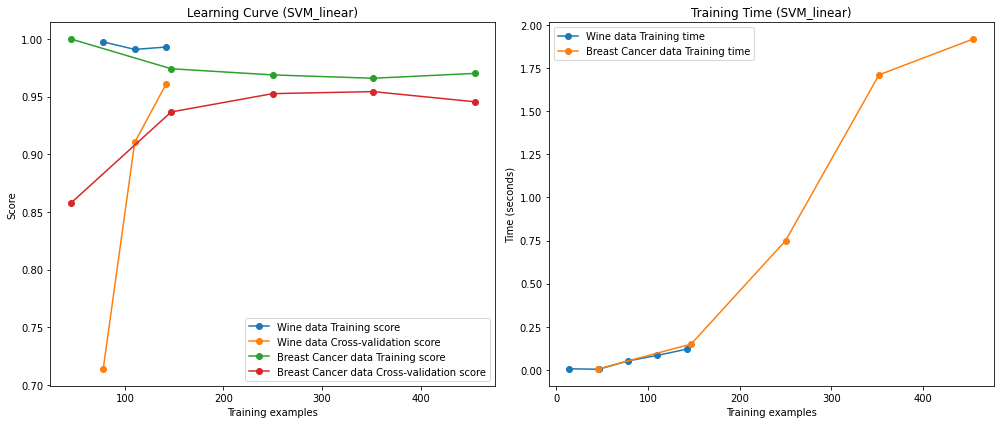

<ipython-input-3-dd1ecfe7a406>:32: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(1, 2, 1)
<ipython-input-3-dd1ecfe7a406>:37: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(1, 2, 2)
<ipython-input-3-dd1ecfe7a406>:40: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and r

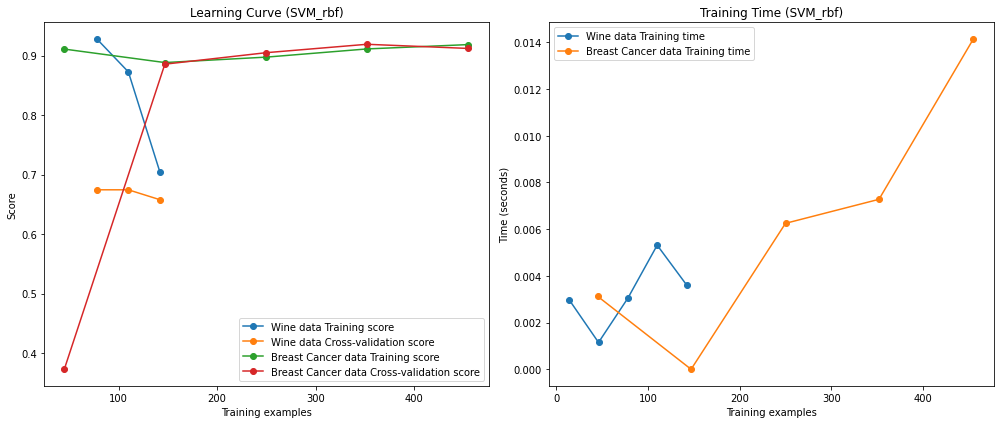

<ipython-input-3-dd1ecfe7a406>:32: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(1, 2, 1)
<ipython-input-3-dd1ecfe7a406>:37: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(1, 2, 2)
<ipython-input-3-dd1ecfe7a406>:40: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and r

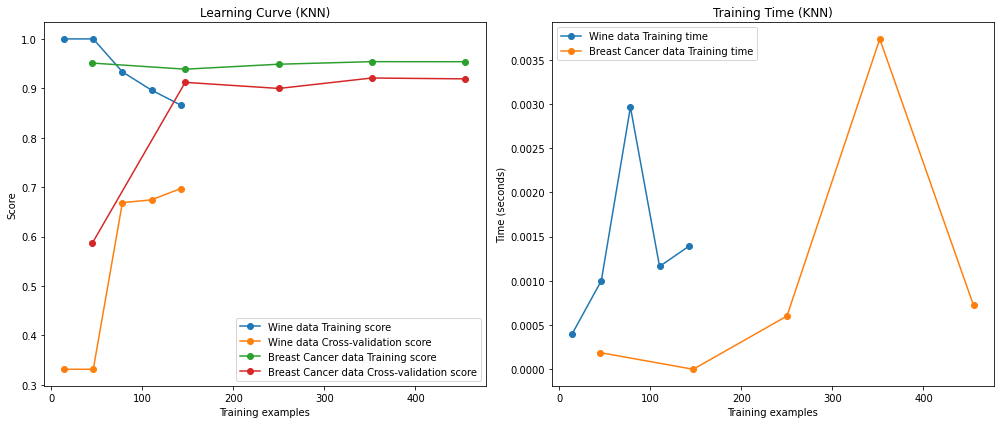

In [3]:
# Load data
wine_data = load_wine()
X_wine = wine_data.data
y_wine = wine_data.target

breast_cancer_data = load_breast_cancer()
X_cancer = breast_cancer_data.data
y_cancer = breast_cancer_data.target

# 定义模型
models = {
    "Decision Tree": DecisionTreeClassifier(max_depth=4, random_state=42),
    "MLP": MLPClassifier(hidden_layer_sizes=(100, 100), activation='relu', max_iter=500, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, max_depth=3, random_state=42),
    "SVM_linear": SVC(kernel='linear', C=1.0, random_state=42),
    "SVM_rbf": SVC(kernel='rbf', C=1.0, random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=3)
}

def plot_combined_learning_curve(model, name, datasets):
    plt.figure(figsize=(14, 6))

    for i, (data_name, X, y) in enumerate(datasets):
        train_sizes, train_scores, test_scores, fit_times, _ = learning_curve(
            model, X, y, cv=5, return_times=True, train_sizes=np.linspace(.1, 1.0, 5), n_jobs=-1, scoring='accuracy')

        train_scores_mean = np.mean(train_scores, axis=1)
        test_scores_mean = np.mean(test_scores, axis=1)
        fit_times_mean = np.mean(fit_times, axis=1)

        # Plot learning curve
        plt.subplot(1, 2, 1)
        plt.plot(train_sizes, train_scores_mean, 'o-', label=f'{data_name} Training score')
        plt.plot(train_sizes, test_scores_mean, 'o-', label=f'{data_name} Cross-validation score')

        # Plot training time
        plt.subplot(1, 2, 2)
        plt.plot(train_sizes, fit_times_mean, 'o-', label=f'{data_name} Training time')

    plt.subplot(1, 2, 1)
    plt.title(f'Learning Curve ({name})')
    plt.xlabel('Training examples')
    plt.ylabel('Score')
    plt.legend(loc='best')

    plt.subplot(1, 2, 2)
    plt.title(f'Training Time ({name})')
    plt.xlabel('Training examples')
    plt.ylabel('Time (seconds)')
    plt.legend(loc='best')

    plt.tight_layout()
    plt.show()

# Combine datasets in a list
datasets = [
    ('Wine data', X_wine, y_wine),
    ('Breast Cancer data', X_cancer, y_cancer)
]

# Plot the learning curves for both datasets
# 对每个模型执行
for name, model in models.items():
    plot_combined_learning_curve(model, name, datasets)

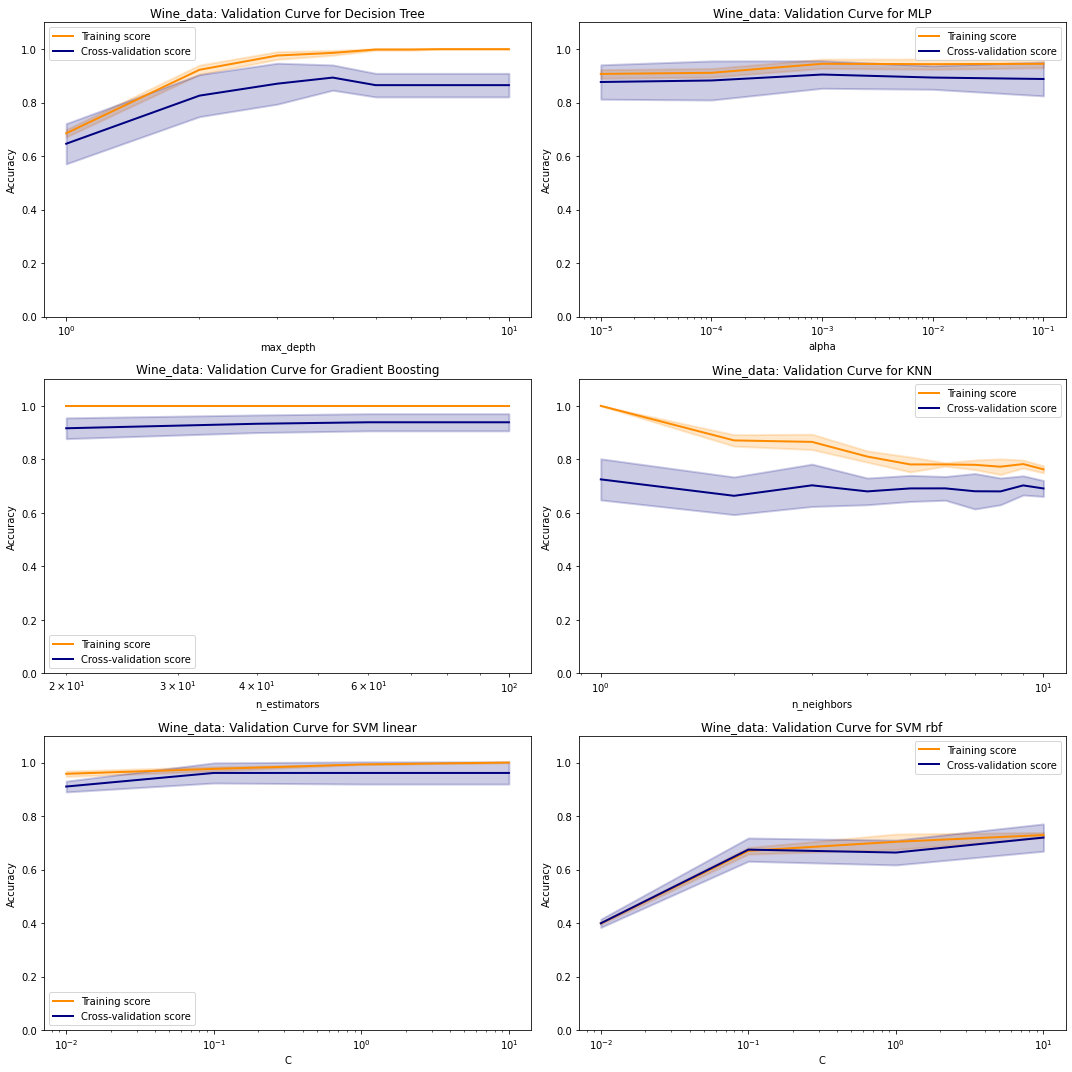

In [4]:
# Set the size of the plot
plt.figure(figsize=(15, 15))  # Adjusted for additional subplots

# Define models and hyperparameters
model_params = [
    ("Decision Tree", DecisionTreeClassifier(random_state=42), "max_depth", range(1, 11)),
    ("MLP", MLPClassifier(random_state=42), "alpha", np.logspace(-5, -1, 5)),
    ("Gradient Boosting", GradientBoostingClassifier(random_state=42), "n_estimators", range(20, 101, 20)),
    # Removed SVM from here, will add separately due to different kernels
    ("KNN", KNeighborsClassifier(), "n_neighbors", range(1, 11))
]

# Add SVM with different kernels to the list
svm_kernels = ['linear', 'rbf']
for kernel in svm_kernels:
    model_params.append(("SVM " + kernel, SVC(kernel=kernel, random_state=42), "C", np.logspace(-2, 1, 4)))

# Iterate over the models and hyperparameters
for idx, (name, model, param_name, param_range) in enumerate(model_params):
    # Calculate validation curve
    train_scores, test_scores = validation_curve(
        model, X_wine, y_wine, param_name=param_name, param_range=param_range,
        cv=5, scoring="accuracy", n_jobs=-1
    )

    # Calculate mean and standard deviation of training and test scores
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    # Create subplot for each model
    plt.subplot(len(model_params) // 2 + len(model_params) % 2, 2, idx + 1)
    plt.title(f'Wine_data: Validation Curve for {name}')
    plt.xlabel(param_name)
    plt.ylabel('Accuracy')
    plt.ylim(0.0, 1.1)
    lw = 2

    # Plot training and test scores with bands for standard deviation
    plt.semilogx(param_range, train_scores_mean, label="Training score", color="darkorange", lw=lw)
    plt.fill_between(param_range, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.2, color="darkorange", lw=lw)
    plt.semilogx(param_range, test_scores_mean, label="Cross-validation score", color="navy", lw=lw)
    plt.fill_between(param_range, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.2, color="navy", lw=lw)
    plt.legend(loc="best")

# Adjust layout
plt.tight_layout()
plt.show()

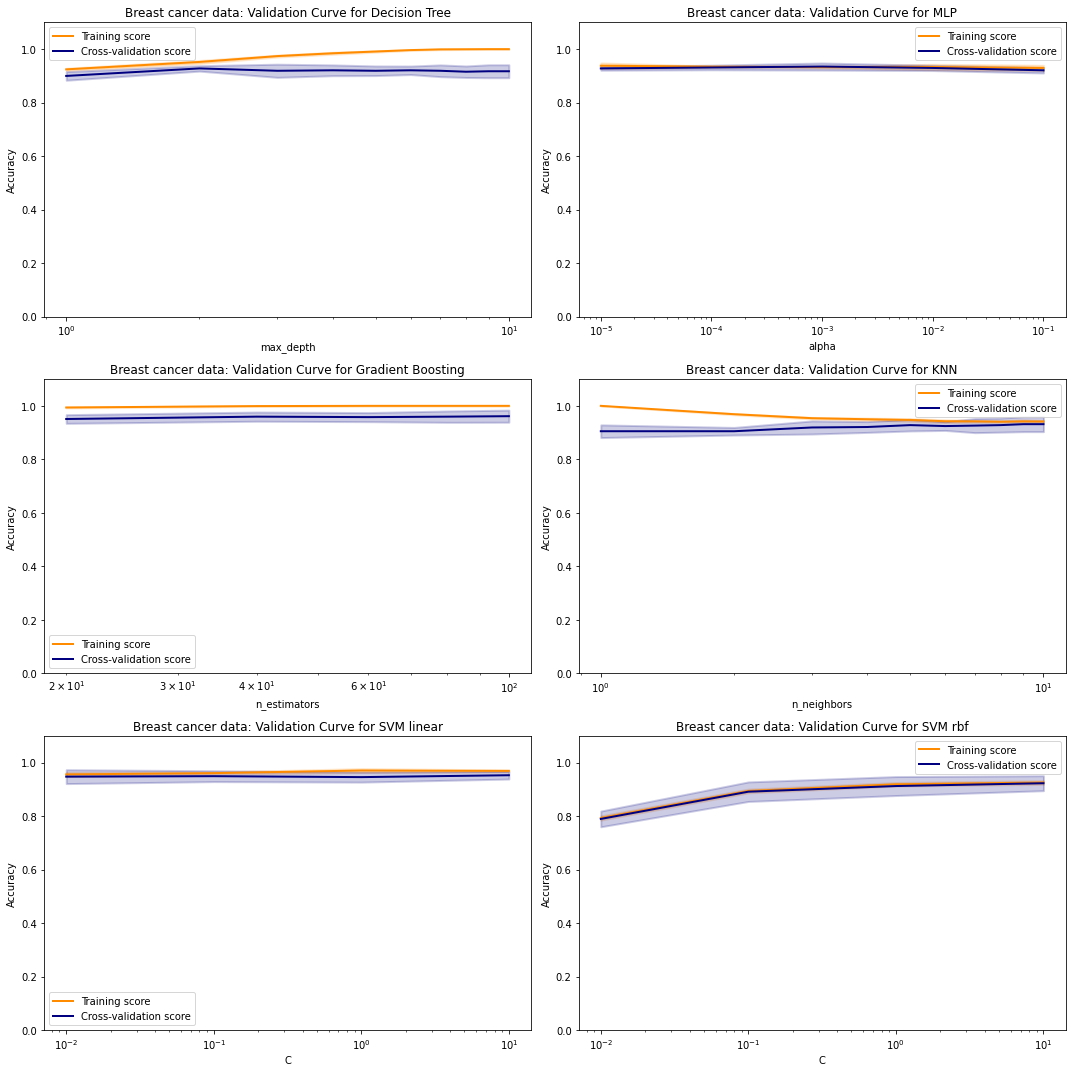

In [6]:
# Set the size of the plot
plt.figure(figsize=(15, 15))  # Adjusted for additional subplots

# Define models and hyperparameters
model_params = [
    ("Decision Tree", DecisionTreeClassifier(random_state=42), "max_depth", range(1, 11)),
    ("MLP", MLPClassifier(random_state=42), "alpha", np.logspace(-5, -1, 5)),
    ("Gradient Boosting", GradientBoostingClassifier(random_state=42), "n_estimators", range(20, 101, 20)),
    # Removed SVM from here, will add separately due to different kernels
    ("KNN", KNeighborsClassifier(), "n_neighbors", range(1, 11))
]

# Add SVM with different kernels to the list
svm_kernels = ['linear', 'rbf']
for kernel in svm_kernels:
    model_params.append(("SVM " + kernel, SVC(kernel=kernel, random_state=42), "C", np.logspace(-2, 1, 4)))

# Iterate over the models and hyperparameters
for idx, (name, model, param_name, param_range) in enumerate(model_params):
    # Calculate validation curve
    train_scores, test_scores = validation_curve(
        model, X_cancer, y_cancer, param_name=param_name, param_range=param_range,
        cv=5, scoring="accuracy", n_jobs=-1
    )

    # Calculate mean and standard deviation of training and test scores
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    # Create subplot for each model
    plt.subplot(len(model_params) // 2 + len(model_params) % 2, 2, idx + 1)
    plt.title(f'Breast cancer data: Validation Curve for {name}')
    plt.xlabel(param_name)
    plt.ylabel('Accuracy')
    plt.ylim(0.0, 1.1)
    lw = 2

    # Plot training and test scores with bands for standard deviation
    plt.semilogx(param_range, train_scores_mean, label="Training score", color="darkorange", lw=lw)
    plt.fill_between(param_range, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.2, color="darkorange", lw=lw)
    plt.semilogx(param_range, test_scores_mean, label="Cross-validation score", color="navy", lw=lw)
    plt.fill_between(param_range, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.2, color="navy", lw=lw)
    plt.legend(loc="best")

# Adjust layout
plt.tight_layout()
plt.show()